In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.9.1'

In [3]:
keras.__version__

'2.9.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

In [8]:
X_valid.shape

(5000, 28, 28)

In [9]:
X_train.shape

(55000, 28, 28)

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

In [11]:
y_train[0]

4

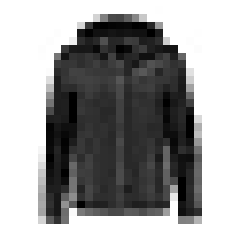

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[0]]

'Coat'

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [17]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7138 - accuracy: 0.7665 - val_loss: 0.5180 - val_accuracy: 0.8286
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4878 - accuracy: 0.8285 - val_loss: 0.4422 - val_accuracy: 0.8500
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4414 - accuracy: 0.8451 - val_loss: 0.4201 - val_accuracy: 0.8566
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4134 - accuracy: 0.8546 - val_loss: 0.4118 - val_accuracy: 0.8572
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3933 - accuracy: 0.8613 - val_loss: 0.3929 - val_accuracy: 0.8658
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3775 - accuracy: 0.8658 - val_loss: 0.3685 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3637 - accuracy: 0.8707 - val_loss: 0.3696 - val_accuracy:

In [18]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights

array([[ 0.00143818, -0.05493884,  0.06102622, ...,  0.03717337,
         0.04022598, -0.04852346],
       [ 0.01808746,  0.03886367, -0.03241152, ...,  0.00139721,
         0.03649462, -0.01288993],
       [ 0.01934078,  0.05428992, -0.02213036, ...,  0.06946348,
        -0.00605522,  0.03532552],
       ...,
       [-0.00366002,  0.0465774 ,  0.04344231, ...,  0.05039415,
        -0.03402203, -0.03064756],
       [-0.07281059, -0.02646295, -0.05708208, ..., -0.03402309,
        -0.03369428,  0.05648468],
       [ 0.05737573,  0.02013538, -0.07098225, ...,  0.06010062,
         0.0570121 ,  0.03312442]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([-0.02186303,  0.07856736,  0.04142438,  0.10695644, -0.00910295,
        0.03888486, -0.00239661,  0.01058088,  0.17168275,  0.0445845 ,
        0.05924326,  0.06947023,  0.1083053 ,  0.11479495,  0.06763045,
        0.0678033 ,  0.08108506, -0.04046763,  0.02560746,  0.02561519,
       -0.01289724,  0.08170313,  0.00428514,  0.11539774, -0.0201579 ,
       -0.01637963,  0.0957803 ,  0.05310912, -0.01300889, -0.05101305,
        0.00520442, -0.02766751,  0.01161001, -0.00614416,  0.0348028 ,
        0.00142625,  0.09549774,  0.01194431, -0.01476939,  0.11842018,
        0.0321378 ,  0.1267215 ,  0.12414061, -0.00664482,  0.15721464,
       -0.01088918,  0.01441444,  0.03399618,  0.04872796,  0.04121476,
       -0.01819278,  0.0371654 ,  0.06445292,  0.10065714,  0.05970154,
        0.05177899,  0.09416047,  0.00995881,  0.03162912,  0.09905083,
        0.14999142,  0.00951075,  0.09708335,  0.04436773,  0.02809775,
       -0.00203992,  0.04167295,  0.00713484, -0.00204684, -0.02

In [21]:
biases.shape

(300,)

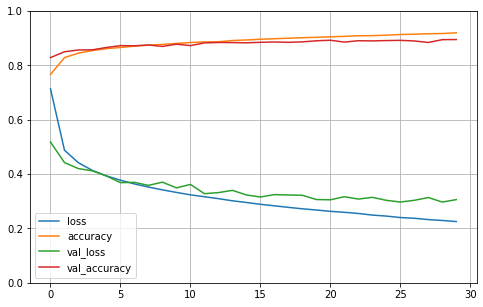

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3361 - accuracy: 0.8815


[0.3360637426376343, 0.8815000057220459]

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 77ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.04, 0.  , 0.94],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [25]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

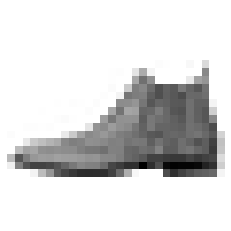

In [24]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0], cmap="binary")
plt.axis('off')
plt.show()

In [25]:
y_test[0]

9

In [32]:
#precision recall f1
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# assume y_pred and y_test are the predicted and true class labels for the test set, respectively
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = y_test

precision = precision_score(y_test_classes, y_pred_classes, average='macro')
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

313/313 [==============================] - 1s 2ms/step
Precision: 0.8814139616198963
Recall: 0.8815
F1 score: 0.8793837352609251


In [31]:
y_test.shape

(10000,)

### Batch normalization, He initialization, ELU
p.337



In [33]:
model1 = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
 keras.layers.BatchNormalization(),
 keras.layers.Activation("elu"),
 keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
 keras.layers.Activation("elu"),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(10, activation="softmax")
])

In [34]:
#model1.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
#optimizer 상세 설정
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

model2.compile(loss="sparse_categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"])

NameError: name 'model2' is not defined

In [36]:
history1 = model1.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4756 - accuracy: 0.8294 - val_loss: 0.3876 - val_accuracy: 0.8602
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3743 - accuracy: 0.8631 - val_loss: 0.3374 - val_accuracy: 0.8758
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3411 - accuracy: 0.8758 - val_loss: 0.3149 - val_accuracy: 0.8820
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3147 - accuracy: 0.8836 - val_loss: 0.3177 - val_accuracy: 0.8834
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2988 - accuracy: 0.8893 - val_loss: 0.2990 - val_accuracy: 0.8872
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2842 - accuracy: 0.8938 - val_loss: 0.2918 - val_accuracy: 0.8958
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2687 - accuracy: 0.8992 - val_loss: 0.3095 - val_accuracy

### Dropout 을 설정하는 방법, SELU

In [35]:
model2 = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dropout(rate=0.2),
 keras.layers.Dense(300, activation="selu", kernel_initializer="he_normal"),
 keras.layers.Dropout(rate=0.2),
 keras.layers.Dense(100, activation="selu", kernel_initializer="he_normal"),
 keras.layers.Dropout(rate=0.2),
 keras.layers.Dense(10, activation="softmax")
])

In [36]:
#model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model2.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [37]:
history2 = model1.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.4801 - accuracy: 0.8276 - val_loss: 0.3635 - val_accuracy: 0.8684
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3796 - accuracy: 0.8612 - val_loss: 0.3618 - val_accuracy: 0.8696
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3418 - accuracy: 0.8742 - val_loss: 0.3194 - val_accuracy: 0.8820
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3185 - accuracy: 0.8822 - val_loss: 0.3135 - val_accuracy: 0.8856
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2969 - accuracy: 0.8896 - val_loss: 0.3114 - val_accuracy: 0.8844
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2799 - accuracy: 0.8957 - val_loss: 0.3099 - val_accuracy: 0.8864
Epoch 7/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.2712 - accuracy: 0.8989 - val_loss: 0.3079 - val_accuracy